# Family size distribution in 4C Heart Atlas cluster

We would like to know whether there are systematic differences between FSD in different cell types?

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import itertools
import operator
from commons import *
import scipy.sparse as sp
import logging
from collections import Counter
from scipy import stats

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

import scanpy

In [2]:
ann_h5ad_file = '/home/jupyter/data/PCL/LA_1600_1_raw_data_with_labels.h5ad'
mol_info_h5_file = '/home/jupyter/data/PCL/LA_1600_molecule_info.h5'

In [3]:
ann = scanpy.read(ann_h5ad_file)
labels = ann.obs
barcodes = [barcode[10:26] for barcode in labels.index.values]
encoded_barcodes = [encode(barcode) for barcode in barcodes]
cluster_labels = [int(x) for x in labels['louvain_1.2'].values]

In [4]:
mol_info = MoleculeInfo(mol_info_h5_file)

In [5]:
cluster_mol_indices = dict()
cluster_barcodes = dict()

for c_cluster in set(cluster_labels):
    c_cluster_barcodes = set(
        barcode for barcode, cluster in zip(encoded_barcodes, cluster_labels)
        if cluster == c_cluster)
    c_mol_indices = [
        idx for idx, barcode in enumerate(mol_info.barcode_array)
        if barcode in c_cluster_barcodes]
    cluster_barcodes[c_cluster] = c_cluster_barcodes
    cluster_mol_indices[c_cluster] = c_mol_indices
    print(f'cluster: {c_cluster}')
    print(f'number of cells: {len(c_cluster_barcodes)}')
    print(f'number of molecules: {len(c_mol_indices)}')
    print(f'molecules/cell: {len(c_mol_indices)/len(c_cluster_barcodes)}')

cluster: 0
number of cells: 2078
number of molecules: 3493433
molecules/cell: 1681.1515880654476
cluster: 1
number of cells: 2
number of molecules: 6535
molecules/cell: 3267.5
cluster: 2
number of cells: 846
number of molecules: 2100733
molecules/cell: 2483.1359338061466
cluster: 3
number of cells: 14
number of molecules: 15423
molecules/cell: 1101.642857142857
cluster: 4
number of cells: 605
number of molecules: 759727
molecules/cell: 1255.7471074380164
cluster: 5
number of cells: 1657
number of molecules: 1475409
molecules/cell: 890.4097767048884
cluster: 6
number of cells: 528
number of molecules: 649123
molecules/cell: 1229.3996212121212
cluster: 7
number of cells: 664
number of molecules: 1066080
molecules/cell: 1605.5421686746988
cluster: 8
number of cells: 102
number of molecules: 286947
molecules/cell: 2813.205882352941
cluster: 9
number of cells: 5
number of molecules: 4718
molecules/cell: 943.6
cluster: 10
number of cells: 29
number of molecules: 38577
molecules/cell: 1330.24

In [9]:
gene_names = [x.decode('ascii') for x in mol_info.gene_names_array]
gene_name = 'NPPA'
gene_index = [idx for idx, name in enumerate(gene_names) if name.find(gene_name) != -1]

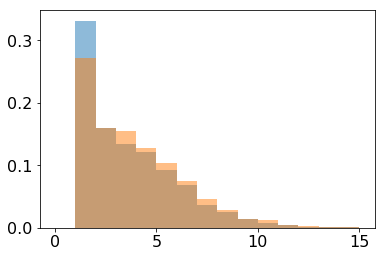

In [23]:
gene_index = 259

for cluster_index in [0, 2]:
    selected_barcode_array = mol_info.barcode_array[cluster_mol_indices[cluster_index]]
    selected_gene_array = mol_info.gene_array[cluster_mol_indices[cluster_index]]
    selected_reads_array = mol_info.reads_array[cluster_mol_indices[cluster_index]]

    family_sizes = selected_reads_array[selected_gene_array == gene_index]
    plt.hist(family_sizes, bins=15, range=(0, 15), density=True, alpha=0.5)